使用卷积神经网络手写数字识别 正确率在89%


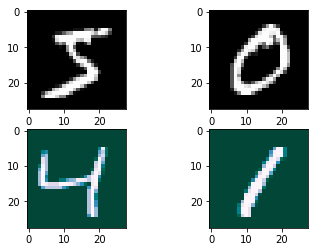

In [5]:
% matplotlib inline

from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('PuBuGn_r'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('PuBuGn_r'))
# show the plot
plt.show()

In [12]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [13]:
#加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [14]:
# 对输出进行one hot编码
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [15]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [16]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  app.launch_new_instance()
D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
D:\Anaconda\envs\tensorflow\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2754 - acc: 0.9200 - val_loss: 0.1420 - val_acc: 0.9591
Epoch 2/10
 - 6s - loss: 0.1093 - acc: 0.9685 - val_loss: 0.0929 - val_acc: 0.9719
Epoch 3/10
 - 6s - loss: 0.0704 - acc: 0.9797 - val_loss: 0.0774 - val_acc: 0.9761
Epoch 4/10
 - 6s - loss: 0.0498 - acc: 0.9851 - val_loss: 0.0716 - val_acc: 0.9784
Epoch 5/10
 - 6s - loss: 0.0356 - acc: 0.9896 - val_loss: 0.0667 - val_acc: 0.9785
Epoch 6/10
 - 6s - loss: 0.0250 - acc: 0.9934 - val_loss: 0.0668 - 

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
# 输出错误率
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.89%
